# Use the power of sampling distributions!

In [212]:
# importing necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions import choose_statistic, plot_population_distribution, sampling_distribution

# setting options
pd.set_option('display.max_columns', None)
np.set_printoptions(suppress=True, precision = 2)

## Loading in the Data

In [213]:
# task 1-3: load data and inspect
spotify_data = pd.read_csv('spotify_data.csv', low_memory=False)

In [214]:
spotify_data.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,144.915,audio_features,6fsypiJHyWmeINsOLC1cos,spotify:track:6fsypiJHyWmeINsOLC1cos,https://api.spotify.com/v1/tracks/6fsypiJHyWme...,https://api.spotify.com/v1/audio-analysis/6fsy...,112511,4,Dark Trap,Gatteka,NaN,NaN
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,130.826,audio_features,0XfQbq7DaMOmVXgQ71eA6E,spotify:track:0XfQbq7DaMOmVXgQ71eA6E,https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...,https://api.spotify.com/v1/audio-analysis/0XfQ...,77584,4,Dark Trap,kamikaze (+ pulse),NaN,NaN
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,138.049,audio_features,0LLeuNBWPOg3XA73yab3PT,spotify:track:0LLeuNBWPOg3XA73yab3PT,https://api.spotify.com/v1/tracks/0LLeuNBWPOg3...,https://api.spotify.com/v1/audio-analysis/0LLe...,127524,3,Dark Trap,T.R.U. (Totally Rotten Underground),NaN,NaN
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,219.960,audio_features,37gqBnUAZe8BY8WR56kDNk,spotify:track:37gqBnUAZe8BY8WR56kDNk,https://api.spotify.com/v1/tracks/37gqBnUAZe8B...,https://api.spotify.com/v1/audio-analysis/37gq...,140326,4,Dark Trap,I Put My Dick in Your Mental,NaN,NaN
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,199.942,audio_features,2ggqfj97qyiORmXoVFzP5j,spotify:track:2ggqfj97qyiORmXoVFzP5j,https://api.spotify.com/v1/tracks/2ggqfj97qyiO...,https://api.spotify.com/v1/audio-analysis/2ggq...,121979,4,Dark Trap,Andromeda,NaN,NaN


In [215]:
# which columns are in the dataset
spotify_data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [216]:
# commom info about the dataset
spotify_data.info()
spotify_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [217]:
# create a variable called song_tempos that contains the tempo column data (tempo - gives the beats per minute (bpm) of each song)
song_tempos = spotify_data['tempo']

## Helper Functions

A file called helper_functions.py contains three functions: 
- choose_statistic() -> The function allows to choose a statistic for sampling and population distributions
- plot_population_distribution() -> The function allows to plot the population distribution and sampling distribution
- and sampling_distribution() -> The function allows to plot a simulated sampling distribution of a statistic

## Sampling Distribution Exploration

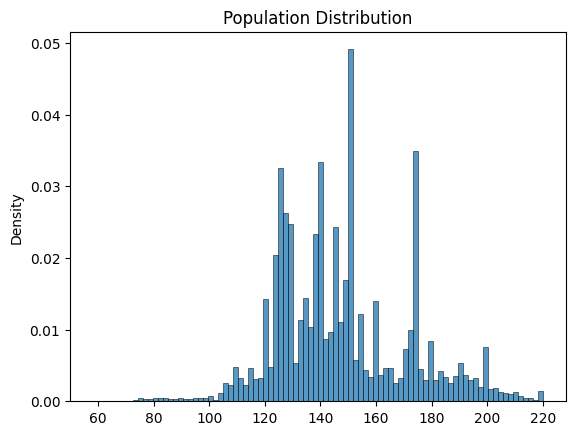

<Figure size 640x480 with 0 Axes>

In [218]:
# task 5: using the plot_population_distribution function
plot_population_distribution(song_tempos)


The population distribution is approximately normal with a little bit of right-skewness.

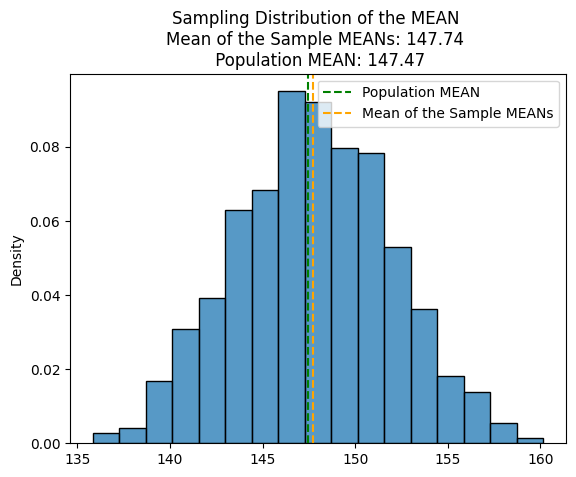

<Figure size 640x480 with 0 Axes>

In [219]:
# task 6-7: plot the sampling distribution of the sample mean with sample sizes of 30 songs
# set sample size
sample_size = 30

sampling_distribution(song_tempos, sample_size, 'MEAN')

The mean of the sampling distribution of the means is almost equal to population mean value. The sample mean value is unbiased estimator of population.

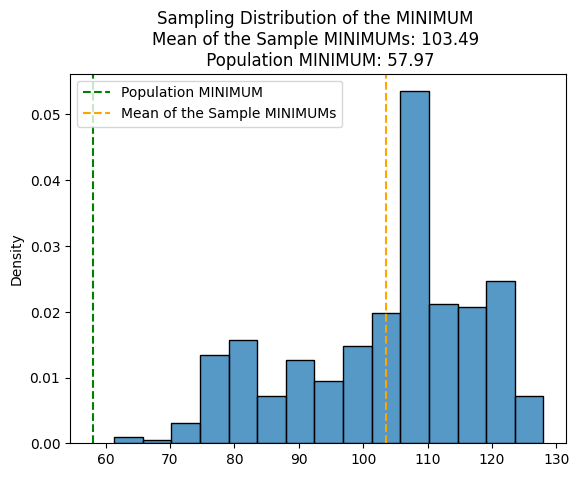

<Figure size 640x480 with 0 Axes>

In [220]:
# task 8: plot the sampling distribution of the sample minimum with sample sizes of 30 songs
sampling_distribution(song_tempos, sample_size, 'MINIMUM')

The mean of the sampling distribution of the minimums is not approximately the same as the population minimum value. The sample minimum value is biased estimator of population.

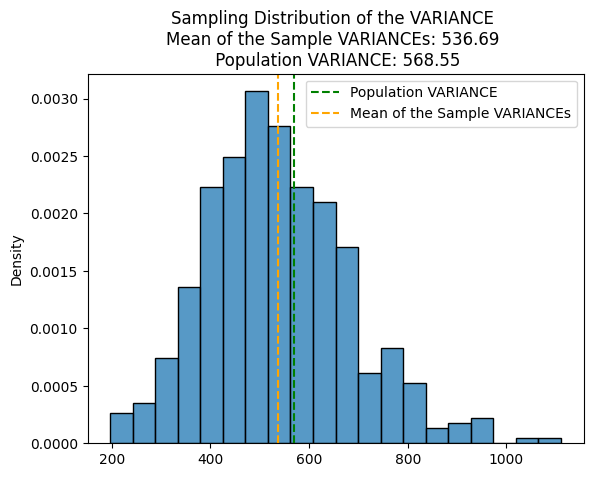

<Figure size 640x480 with 0 Axes>

In [221]:
# task 10: plot the sampling distribution of the sample variance with sample sizes of 30 songs
sampling_distribution(song_tempos, sample_size, 'VARIANCE')

It seems that the mean sample variance is a biased estimator. But with the parameter ddof=1 it will be an unbiased estimator.

In [222]:
# task 13: calculate the population mean and population standard deviation of song_tempos
population_mean = round(np.mean(song_tempos), 2)
population_std = round(np.std(song_tempos), 2)
print(f"{population_mean} | {population_std}")

147.47 | 23.84


In [223]:
# task 14: calculate the standard error of the sampling distribution of the sample mean with a sample size
standard_error = population_std / np.sqrt(sample_size)
print(f"{standard_error:.2f}")

4.35


In [224]:
# task 15: calculate the probability that the sample mean of 30 selected songs is less than 140bpm
prob_140_or_less =  stats.norm.cdf(140, population_mean, standard_error)
print(f"The probability that the sample mean of {sample_size} selected songs is less than 140bpm is {prob_140_or_less:.4f}")

The probability that the sample mean of 30 selected songs is less than 140bpm is 0.0431


In [225]:
# # task 16: calculate the probability of observing an average tempo of 150bpm or higher from a sample of songs
prob_150_or_more = 1 - stats.norm.cdf(150, population_mean, standard_error)
print(f"The probability that the sample mean of {sample_size} selected songs is GREATER than 150bpm {prob_150_or_more:.4f}")

The probability that the sample mean of 30 selected songs is GREATER than 150bpm 0.2805


## Extra

In [226]:
# max duration of a song
filt_max = spotify_data['duration_ms'] == spotify_data['duration_ms'].max()
max_duration_song = spotify_data[filt_max]

In [227]:
max_duration_song[['song_name', 'title', 'duration_ms', 'track_href']]

,song_name,title,duration_ms,track_href
31428,NaN,PSYTRANCE BANGERS best new 2020,913052,https://api.spotify.com/v1/tracks/16Sff1KTYV40...


In [234]:
# task 17: the probability of getting a sample minimum that is less than 130bpm

# list that will hold the sample statistics of minimums
minimum_sample_stats = []
for i in range(500):
    # get a random sample from the population of size sample_size
    samp = np.random.choice(song_tempos, size=sample_size, replace=False)
    # calculate the minimum statistic of the sample
    min_samp_stat = choose_statistic(samp, 'minimum')
    # add sample_stat to the sample_stats list
    minimum_sample_stats.append(min_samp_stat)

# the probability of getting a sample minimum that is less than 130bpm
minimum_sample_stats_array = np.array(minimum_sample_stats)
prob_min_130_or_less = np.mean(minimum_sample_stats_array < 130)
print(f"The probability of getting a sample minimum that is less than 130bpm is {prob_min_130_or_less:.4f}")

The probability of getting a sample minimum that is less than 130bpm is 1.0000
